## Final Project Submission

Please fill out:
* Student name: 
* Student pace:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
original_length = df.shape[0]; original_length

21597

In [4]:
original_features_list = list(df.columns)
original_features_list.sort()
print(original_features_list)

['bathrooms', 'bedrooms', 'condition', 'date', 'floors', 'grade', 'id', 'lat', 'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']


In [5]:
# display(df) # eyeball the cols

In [6]:
df.info() # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
# date may need to be modified somehow, to be useful
# See df.sqft_basement.value_counts() -- This col is object-type bc it has '?' entries

## Scrubbing

In [8]:
df = df.drop(columns=['id'])

In [9]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
df = df.dropna(subset=['view'])
## dropping 'view' nulls, because there are few

In [11]:
# replace waterfront with 0's
# df.waterfront.replace()

In [12]:
# deal with df.yr_renovated

# Multicollinearity checks

In [13]:
# Set the style of the visualization
# sns.set(style="white")

In [14]:
# Create a covariance matrix
# corr = df.corr()

## Heatmap & Hists

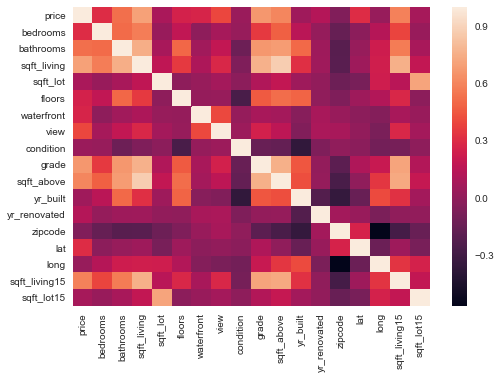

In [15]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr());

In [16]:
(abs(df.corr()) > 0.70).sum()
# sqft_living is a great candidate for removal

price            2
bedrooms         1
bathrooms        2
sqft_living      6
sqft_lot         2
floors           1
waterfront       1
view             1
condition        1
grade            4
sqft_above       4
yr_built         1
yr_renovated     1
zipcode          1
lat              1
long             1
sqft_living15    4
sqft_lot15       2
dtype: int64

Candidates for removal: ...

## Histograms & Outlier Culling

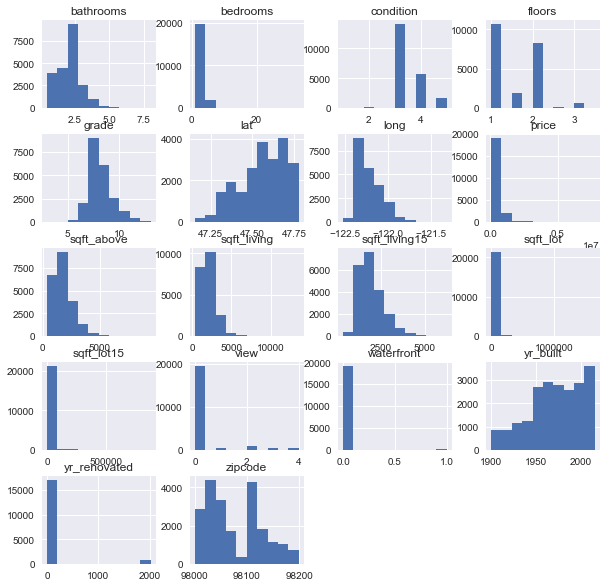

In [17]:
df.hist(figsize=(10,10));

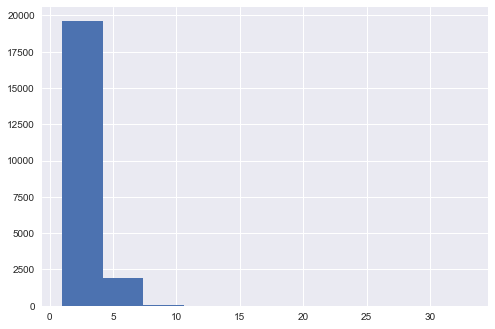

In [18]:
df.bedrooms.hist();

In [19]:
df.bedrooms.value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

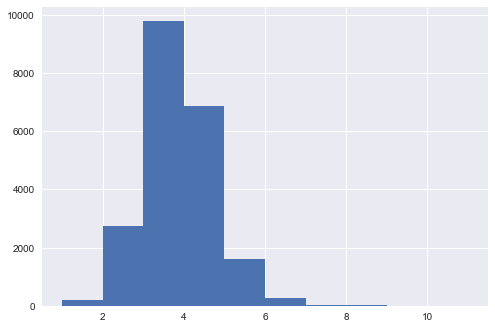

In [20]:
df = df[df.bedrooms <= 11]
# display(df.bedrooms.value_counts())
df.bedrooms.hist()

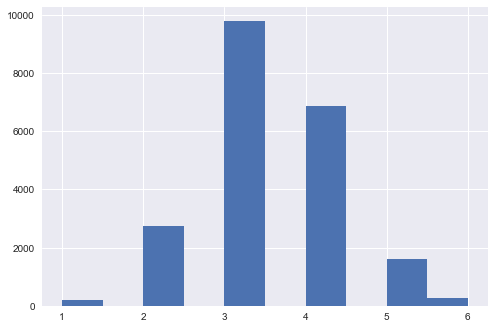

In [21]:
df = df[df.bedrooms <= 6]
df.bedrooms.hist()

In [22]:
len(df.bedrooms)/original_length

0.9942121590961708

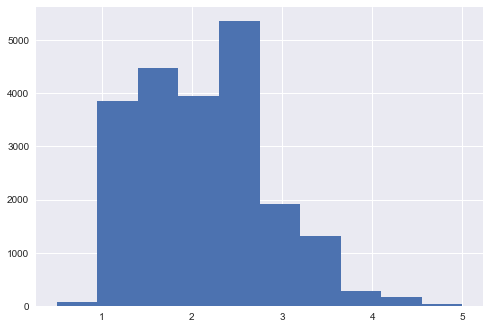

In [23]:
df = df[df.bathrooms <= 5]
df.bathrooms.hist()

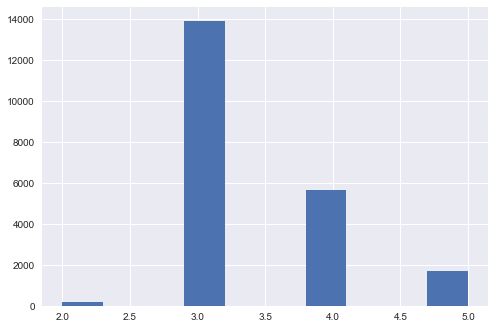

In [24]:
df = df[df.condition >= 2]
df.condition.hist()

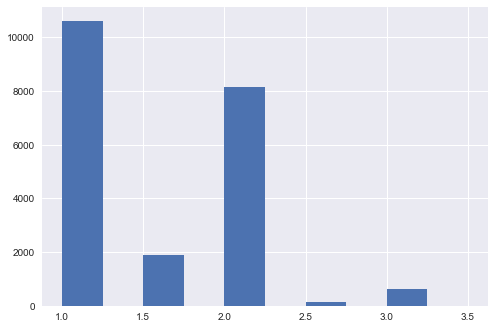

In [25]:
df.floors.hist()

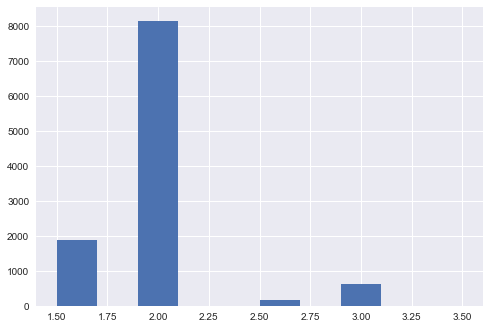

In [26]:
df.floors[df.floors > 1].hist()

In [27]:
df.floors.value_counts().sum()

21408

In [28]:
# df.floors[(df.floors > 1) & (df.floors < 3)].hist(bins=7)
df.floors[(df.floors > 1) & (df.floors < 3)].value_counts().sum()

10191

In [29]:
# I won't change floors. It'd require deleting half its data. May be thrown out later for lack of normality.

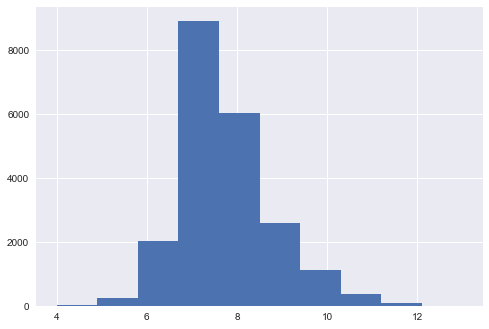

In [30]:
df = df[df.grade > 3]
df.grade.hist()

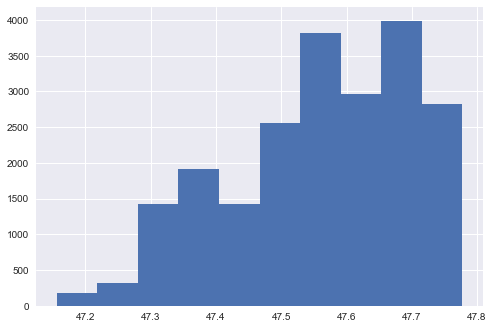

In [31]:
df.lat.hist() # might need be thrown out

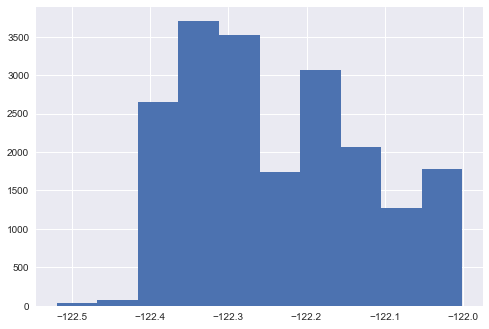

In [32]:
df.long[df.long < -122].hist()

In [33]:
# temp = df.price[df.price <= 700000];
# temp.hist();
# print(temp.value_counts().sum(), "/", df.price.value_counts().sum(), "=", temp.value_counts().sum()/df.price.value_counts().sum())

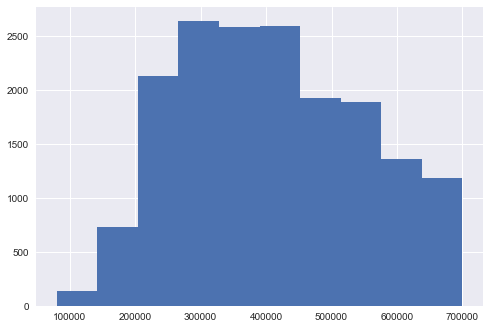

In [34]:
df.price = df.price[df.price <= 700000]
df.price.hist()

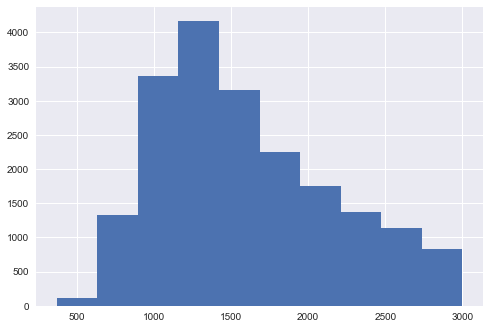

In [35]:
# temp = df.sqft_above[df.sqft_above <= 3000]
# temp.hist()
# print(temp.value_counts().sum()/original_length)

df.sqft_above = df.sqft_above[df.sqft_above <= 3000]
df.sqft_above.hist()

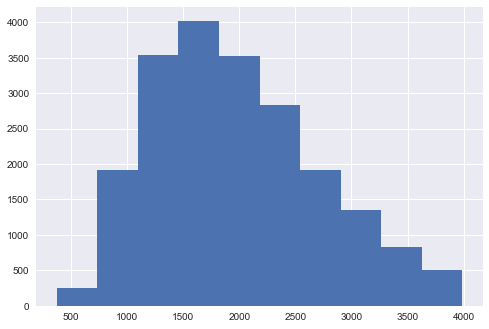

In [36]:
# temp = df.sqft_living[df.sqft_living < 4000]
# temp.hist()
# temp.value_counts().sum()/original_length

df.sqft_living = df.sqft_living[df.sqft_living < 4000]
df.sqft_living.hist()

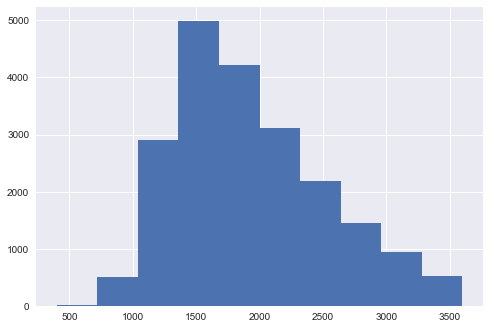

In [37]:
# temp = df.sqft_living15[df.sqft_living15 <= 3600]
# temp.hist()
# temp.value_counts().sum()/original_length

df.sqft_living15 = df.sqft_living15[df.sqft_living15 <= 3600]
df.sqft_living15.hist()

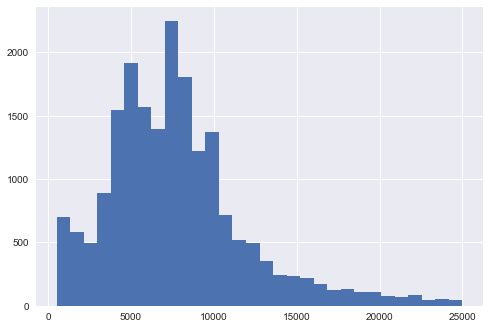

In [38]:
# temp = df.sqft_lot[df.sqft_lot <= 25000]
# temp.hist(bins=30)
# len(temp)/original_length

df.sqft_lot = df.sqft_lot[df.sqft_lot <= 25000]
df.sqft_lot.hist(bins=30)

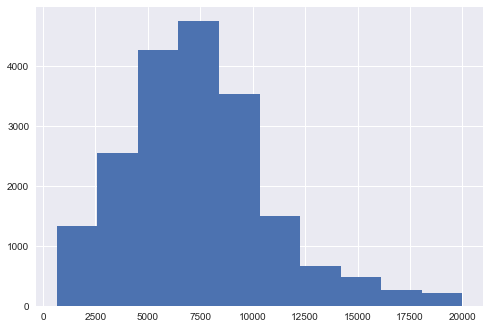

In [39]:
# temp = df.sqft_lot15[df.sqft_lot15 <= 20000]
# temp.hist()
# len(temp)/original_length

df.sqft_lot15 = df.sqft_lot15[df.sqft_lot15 <= 20000]
df.sqft_lot15.hist()

0.9027420937076657


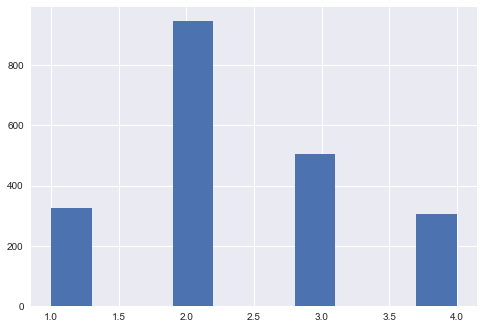

In [40]:
df.view[df.view > 0].hist()
print(df.view[df.view == 0].value_counts().sum()/df.view.value_counts().sum())

## View is normal only if 0's are dropped. However it is 90% zeroes.

In [41]:
df.waterfront.value_counts()

0.0    18909
1.0      141
Name: waterfront, dtype: int64

In [42]:
# temp = df.yr_built[df.yr_built > 0]
# temp.hist()
# len(temp)/original_length

0.033893596332824

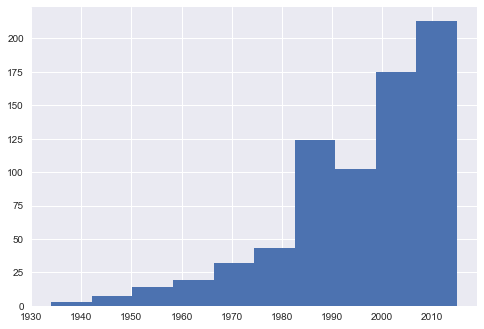

In [43]:
temp = df.yr_renovated[df.yr_renovated > 1750]
temp.hist()
len(temp)/original_length

0.9912024818261795

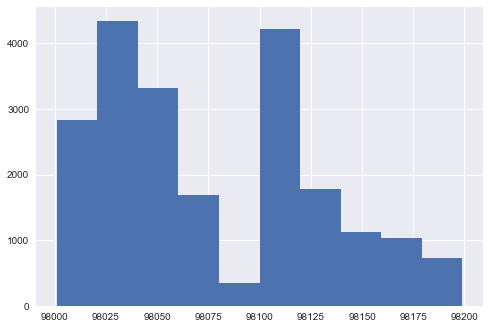

In [44]:
temp = df.zipcode
temp.hist()
len(temp)/original_length
# zipcode can't be normalized (yet). It may be split into two dists

## Normalization

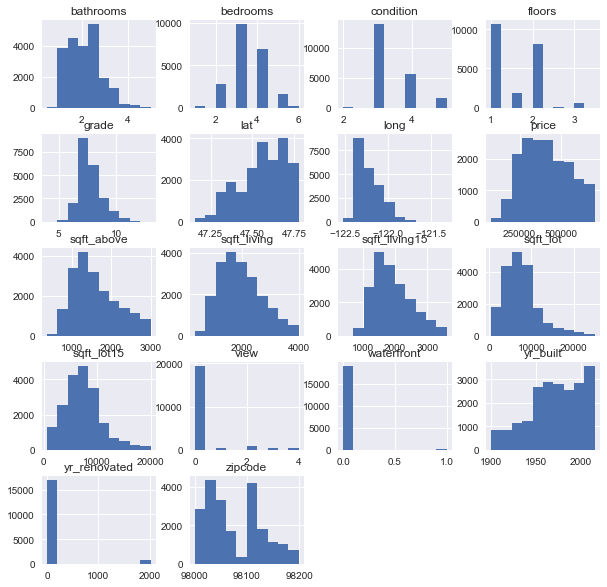

In [45]:
# you can only normalize numeric features...
df.hist(figsize=(10,10));

In [46]:
print(original_features_list)

['bathrooms', 'bedrooms', 'condition', 'date', 'floors', 'grade', 'id', 'lat', 'long', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']


## Log Transformations

In [47]:
import statsmodels.api as smf
from statsmodels.formula.api import ols
# OLS = ordinary least squares

## KDE (Optional) to guarantee Normality
see https://github.com/sid401/dsc-01-10-13-regression-statsmodels-lab-online-ds-pt-011419/blob/f9e0e23f4a0915d437dd072e37733372ae2b5038/index.ipynb

## One Hot Encoding
of categoricals and of discretes construed as categoricals

# Simple OLS

In [48]:
import statsmodels.formula.api as smf

In [49]:
# df.describe()
# df.describe().columns

In [50]:
# df.describe().columns.drop(['price'])
# df.describe()

In [51]:
# this code produces Simple/Single Linear Regressions results (rather than Multiple)
column_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for i, column_name in enumerate(column_names):
    print ("King County: price ~ " + column_name)
    print ("------------------------------")

    f = 'price~' + column_name
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({column_name: [df[column_name].min(), df[column_name].max()]});
    preds = model.predict(X_new)
    results.append([column_name, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[i+1])

King County: price ~ bedrooms
------------------------------
['bedrooms', 0.04694040364278218, 292682.76359954727, 35974.760203484264, 1.9883479590777007e-181]
King County: price ~ bathrooms
------------------------------
['bathrooms', 0.1320260711231186, 259778.43992608803, 76471.3616249789, 0.0]
King County: price ~ sqft_living
------------------------------
['sqft_living', 0.22067141543222768, 221404.04258378738, 103.82597326696468, 0.0]
King County: price ~ sqft_lot
------------------------------
['sqft_lot', 0.0059186711474544795, 424116.3662601922, -2.6588674231560043, 2.5994979995743344e-22]
King County: price ~ floors
------------------------------
['floors', 0.05205164292038622, 323754.987904407, 59542.70869317004, 1.7319579222172568e-201]
King County: price ~ waterfront
------------------------------
['waterfront', 0.0008590030405825066, 409020.0274988513, 97309.6021307805, 0.00029289252883872547]
King County: price ~ view
------------------------------
['view', 0.02123956612

In [52]:
# Readier results
results_df = pd.DataFrame(results)
results_df.columns = results_df.iloc[0,:]
results_df.drop(labels=results_df.index[0], axis=0, inplace=True)

r_coef = pd.DataFrame((results_df['r_squared'])**0.5)
r_coef.rename(columns={"r_squared":"r_coef"}, inplace=True)
results_df = pd.concat([results_df, r_coef], axis=1)

p_bool = pd.DataFrame(results_df['p-value'] < 0.05)
p_bool.rename(columns={"p-value":"p_bool"}, inplace=True)
results_df = pd.concat([results_df, p_bool], axis=1)

r_coef_bool = pd.DataFrame(results_df['r_coef'] > 0.50)
r_coef_bool.rename(columns={"r_coef":"r_coef_bool"}, inplace=True)
results_df = pd.concat([results_df, r_coef_bool], axis=1)

results_df

,ind_var,r_squared,intercept,slope,p-value,r_coef,p_bool,r_coef_bool
1,bedrooms,0.0469404,292683,35974.8,1.98835e-181,0.216657,True,False
2,bathrooms,0.132026,259778,76471.4,0,0.363354,True,False
3,sqft_living,0.220671,221404,103.826,0,0.469757,True,False
4,sqft_lot,0.00591867,424116,-2.65887,2.5995e-22,0.0769329,True,False
5,floors,0.0520516,323755,59542.7,1.73196e-201,0.228148,True,False
6,waterfront,0.000859003,409020,97309.6,0.000292893,0.0293088,True,False
7,view,0.0212396,404542,39323.5,4.2024e-82,0.145738,True,False
8,condition,0.000366485,394794,4215.59,0.0121431,0.0191438,True,False
9,grade,0.253486,-181933,80765.7,0,0.503474,True,True
10,sqft_above,0.114092,271775,87.6758,0,0.337775,True,False


# Multiple OLS (?)

In [53]:
import statsmodels.formula.api as smf

# Categoricals

(via one-hot or getdummies)

In [54]:
# print(original_features_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21407 entries, 0 to 21596
Data columns (total 20 columns):
date             21407 non-null object
price            17162 non-null float64
bedrooms         21407 non-null int64
bathrooms        21407 non-null float64
sqft_living      20677 non-null float64
sqft_lot         19546 non-null float64
floors           21407 non-null float64
waterfront       19050 non-null float64
view             21407 non-null float64
condition        21407 non-null int64
grade            21407 non-null int64
sqft_above       19466 non-null float64
sqft_basement    21407 non-null object
yr_built         21407 non-null int64
yr_renovated     17602 non-null float64
zipcode          21407 non-null int64
lat              21407 non-null float64
long             21407 non-null float64
sqft_living15    20829 non-null float64
sqft_lot15       19527 non-null float64
dtypes: float64(13), int64(5), object(2)
memory usage: 3.4+ MB


In [62]:
# df[[col1, col2]]
df_categorical = df[['floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode']]

In [ ]:
df.hist();